# Assignment 3

Perform the tasks detailed in the Todo's
Do not change the methods names and signature (unless explicitely asked to do so in the todo)
You are free to add new functions as long as they do not shadow existing function names.


In [40]:
# Todo: Make stratified train test split (both train and test must have the same amount of target classes in them) of features x and y
# stratiefied means that the ratio of 0 & 1 in the target y is the same in both splits.
# hint: look at sklearn documentation, you are of course encouraged to use sklearn functions.
# expected output is a list with 4 items (x_train, x_test, y_train, y_test)
# e.g. for the provided test input, the expected outcome is something like this:
# [array([12,  7,  2,  5,  9, 10, 14]), array([ 6, 11,  8,  1, 15, 13,  3,  4]), array([1, 0, 0, 0, 0, 1, 1]), array([0, 1, 0, 0, 1, 1, 0, 0])]
# so that x_train, x_test, y_train, y_test = split_50_50(x, y) then contains the correct splits

import numpy as np
from sklearn.model_selection import train_test_split

def split_50_50(x, y):
    return train_test_split(x, y, test_size=0.5, stratify=y)


x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0,  1,  1,  1,  1,  1,  1])
x_train, x_test, y_train, y_test = split_50_50(x, y)
print(split_50_50(x, y))

[array([12,  7,  2,  5,  9, 10, 14]), array([ 6, 11,  8,  1, 15, 13,  3,  4]), array([1, 0, 0, 0, 0, 1, 1]), array([0, 1, 0, 0, 1, 1, 0, 0])]


In [41]:
# Todo: balance the dataset
# * balance with the given target set containing only two classes "0" and "1".
# *** (optional) balance with an unknown target set size. may contain an arbitrary amount of classes
# function should return a list or tuple containing x and y in balanced form
# e.g. for the given imput (array([10, 11, 12, 13, 14, 15,  1,  2,  3,  4,  5,  6]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]))


def make_balanced(x, y):
    sample_size = min(len(np.where(y == 1)[0]),  len(np.where(y == 0)[0]))

    xb = x[np.concatenate((np.where(y == 1)[0][:sample_size], np.where(y == 0)[0][:sample_size]))]
    yb = y[np.concatenate((np.where(y == 1)[0][:sample_size], np.where(y == 0)[0][:sample_size]))]
    return xb, yb

    # alternative:
    # sample_size = np.unique(y, return_counts=True)[1].min()
    #
    # xb = []
    # yb = []
    # for target in np.unique(y):
    #     xb.append(x[(np.where(y == target)[0][:sample_size])])
    #     yb.append(y[(np.where(y == target)[0][:sample_size])])
    #
    # return np.concatenate(xb), np.concatenate(yb)


x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0,  1,  1,  1,  1,  1,  1])
x_b, y_b = make_balanced(x, y)
print(make_balanced(x, y))


(array([10, 11, 12, 13, 14, 15,  1,  2,  3,  4,  5,  6]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]))


In [45]:
# Todo: scale the given vector with a min/max scaler
# * find the corresponding function in skelarn
# *** (optional) implement it yourself and compare your results with the sklearn function
# *** (optional) add other scalers aswell


from sklearn.preprocessing import StandardScaler, MinMaxScaler



def scale_this(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]).reshape(-1, 1)
print(scale_this(x))


[[0.        ]
 [0.07142857]
 [0.14285714]
 [0.21428571]
 [0.28571429]
 [0.35714286]
 [0.42857143]
 [0.5       ]
 [0.57142857]
 [0.64285714]
 [0.71428571]
 [0.78571429]
 [0.85714286]
 [0.92857143]
 [1.        ]]


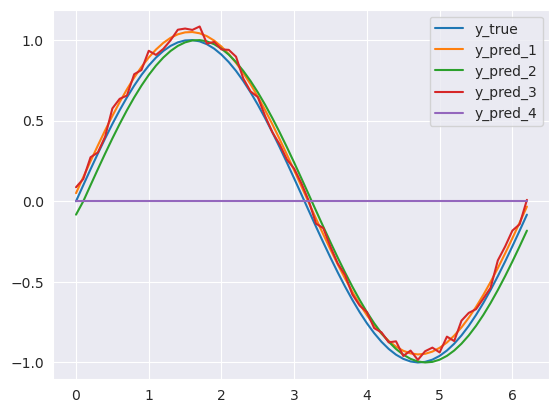

mse: 0.0025000000000000022
mae: 0.05
mape: 3574285418548.152
r2: 0.9949866438830824
mse: 0.0049603498999395675
mae: 0.06347609081287638
mape: 5939704818529.023
r2: 0.9900527997948347
mse: 0.0035061109666794017
mae: 0.050925351985343745
mape: 6218304483187.085
r2: 0.9929690468554425
mse: 0.49866795884691056
mae: 0.6348881537548382
mape: 0.9841269841269841
r2: -2.4718370683629587e-08
mse: 0.0
mae: 0.0
mape: 0.0
r2: 1.0


In [68]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


# Todo: Scoring - calculate mean square error, mean absolute error, mean absolute percentage error, and r2 of the following prediction from a regression problem
# * Calculate the scores, check out sklearn documentation
# * Explain why mape showing such high values?

def do_scoring(y_true, y_pred):
    print(f'mse: {mean_squared_error(y_true, y_pred)}')
    print(f'mae: {mean_absolute_error(y_true, y_pred)}')
    print(f'mape: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'r2: {r2_score(y_true, y_pred)}')


x = np.arange(0, np.pi*2, 0.1)
y_true = np.sin(x)
y_pred_1 = y_true + 0.05
y_pred_2 = np.roll(y_true, shift=1)
y_pred_3 = y_true + np.random.random(len(y_true))*0.1
y_pred_4 = np.zeros(len(y_true))
y_pred_5 = y_true

plt.plot(x, y_true)
plt.plot(x, y_pred_1)
plt.plot(x, y_pred_2)
plt.plot(x, y_pred_3)
plt.plot(x, y_pred_4)
plt.legend(['y_true', 'y_pred_1', 'y_pred_2', 'y_pred_3', 'y_pred_4'])
plt.show()

do_scoring(y_true, y_pred_1)
do_scoring(y_true, y_pred_2)
do_scoring(y_true, y_pred_3)
do_scoring(y_true, y_pred_4)
do_scoring(y_true, y_pred_5)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Todo: Generate polynomial features
# * create polynomial features of degree 2 for the given data z
# output should look something like this:
# [[    1.    11.     1.    11.   121.]
#  [    2.    21.     4.    42.   441.]
#  [    3.    31.     9.    93.   961.]
#  [    4.    41.    16.   164.  1681.]
#  [    5.    51.    25.   255.  2601.]
#  [    6.    61.    36.   366.  3721.]
#  [    7.    71.    49.   497.  5041.]
#  [    8.    81.    64.   648.  6561.]
#  [    9.    91.    81.   819.  8281.]
#  [   10.   101.   100.  1010. 10201.]
#  [   11.   111.   121.  1221. 12321.]
#  [   12.   121.   144.  1452. 14641.]
#  [   13.   131.   169.  1703. 17161.]
#  [   14.   141.   196.  1974. 19881.]
#  [   15.   151.   225.  2265. 22801.]]

def make_polynomial_features(x, degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    return polynomial_features.fit_transform(x)

z = np.array([[  1,  11],
               [  2,  21],
               [  3,  31],
               [  4,  41],
               [  5,  51],
               [  6,  61],
               [  7,  71],
               [  8,  81],
               [  9,  91],
               [ 10, 101],
               [ 11, 111],
               [ 12, 121],
               [ 13, 131],
               [ 14, 141],
               [ 15, 151]])
print(str(make_polynomial_features(z, 2)))

[[1.0000e+00 1.1000e+01 1.0000e+00 1.1000e+01 1.2100e+02]
 [2.0000e+00 2.1000e+01 4.0000e+00 4.2000e+01 4.4100e+02]
 [3.0000e+00 3.1000e+01 9.0000e+00 9.3000e+01 9.6100e+02]
 [4.0000e+00 4.1000e+01 1.6000e+01 1.6400e+02 1.6810e+03]
 [5.0000e+00 5.1000e+01 2.5000e+01 2.5500e+02 2.6010e+03]
 [6.0000e+00 6.1000e+01 3.6000e+01 3.6600e+02 3.7210e+03]
 [7.0000e+00 7.1000e+01 4.9000e+01 4.9700e+02 5.0410e+03]
 [8.0000e+00 8.1000e+01 6.4000e+01 6.4800e+02 6.5610e+03]
 [9.0000e+00 9.1000e+01 8.1000e+01 8.1900e+02 8.2810e+03]
 [1.0000e+01 1.0100e+02 1.0000e+02 1.0100e+03 1.0201e+04]
 [1.1000e+01 1.1100e+02 1.2100e+02 1.2210e+03 1.2321e+04]
 [1.2000e+01 1.2100e+02 1.4400e+02 1.4520e+03 1.4641e+04]
 [1.3000e+01 1.3100e+02 1.6900e+02 1.7030e+03 1.7161e+04]
 [1.4000e+01 1.4100e+02 1.9600e+02 1.9740e+03 1.9881e+04]
 [1.5000e+01 1.5100e+02 2.2500e+02 2.2650e+03 2.2801e+04]]
